source: https://github.com/ddangelov/Top2Vec
source: https://youtu.be/bEaxKSQ4Av8?si=kdVEopPuVPHsBBDl
source: https://developer.ibm.com/tutorials/awb-lda-topic-modeling-text-analysis-python/#step-6-evaluate-models8

In [1]:
# load data
from sklearn.datasets import fetch_20newsgroups
from top2vec import Top2Vec
import tensorflow_hub as hub
import os

In [2]:

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))


In [3]:

# the Universal Sentence Encoder's TF Hub module
model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# topic model
top2vec = Top2Vec(documents=newsgroups.data, embedding_model=model, speed="deep learn", workers=os.cpu_count())


2024-06-08 15:45:45,284 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/Users/grahammarsh/Documents/GitHub/project4/venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-06-08 15:45:49,958 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-06-08 15:46:06,249 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
2024-06-08 15:46:19,411 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-06-08 15:46:21,355 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [4]:
topic_sizes, topic_nums = top2vec.get_topic_sizes()
print(topic_sizes)

[1621 1377 1147  870  778  670  626  614  559  453  428  418  404  400
  387  354  333  328  270  259  259  254  247  222  221  218  206  191
  190  185  181  179  179  171  165  163  158  157  152  152  140  131
  125  120  116  113  110  108  101   99   98   93   92   91   88   87
   87   80   75   74   68   67   67   63   62   61   59   58   54   46
   35   32]


In [5]:
print(topic_nums)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71]


In [6]:
topic_words, word_scores, topic_nums = top2vec.get_topics()

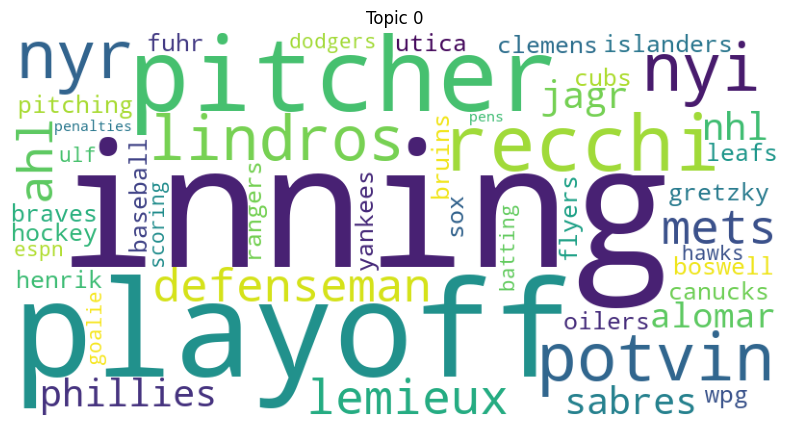

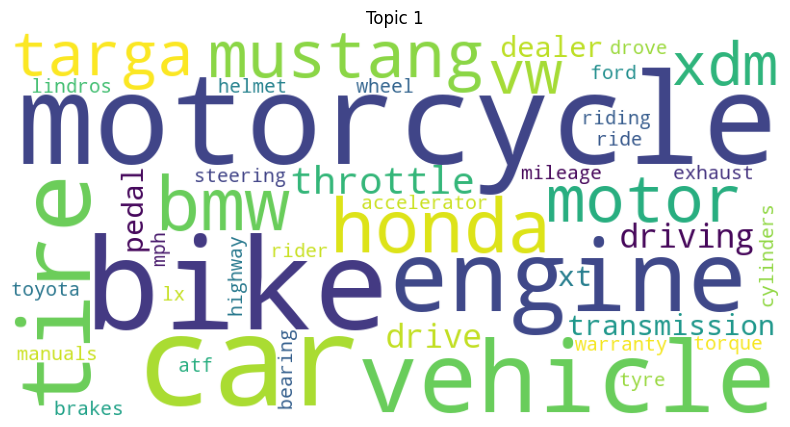

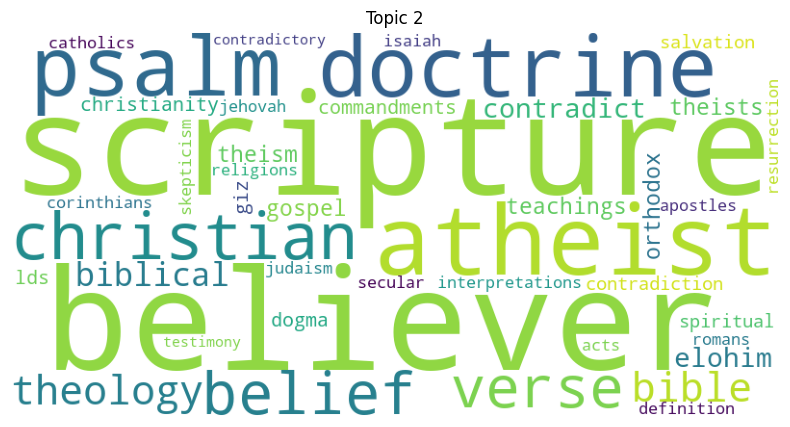

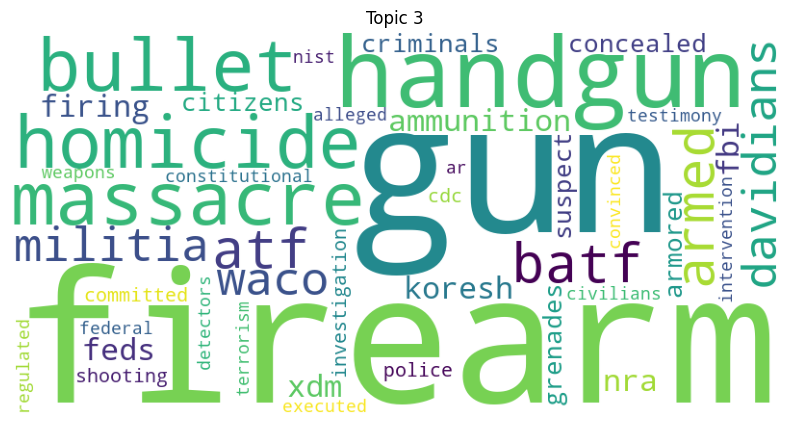

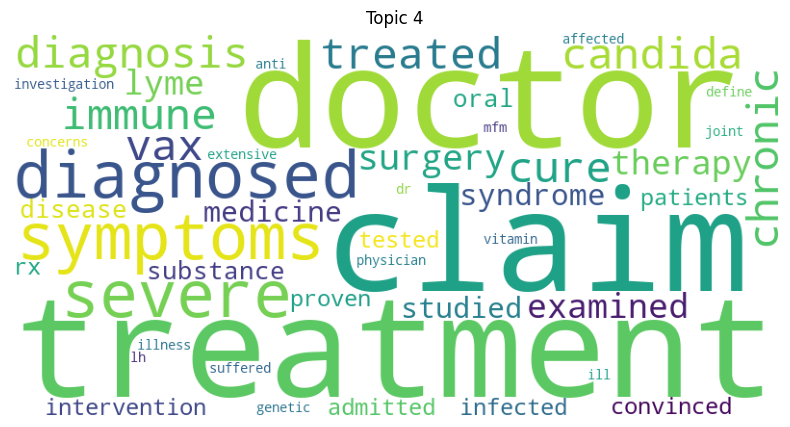

In [7]:
# print first 5 wordclouds
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for i, words in enumerate(topic_words):
    if i == 5: #adjust this number to print more or less wordclouds
        break
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(" ".join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(f"Topic {i}")
    plt.show()


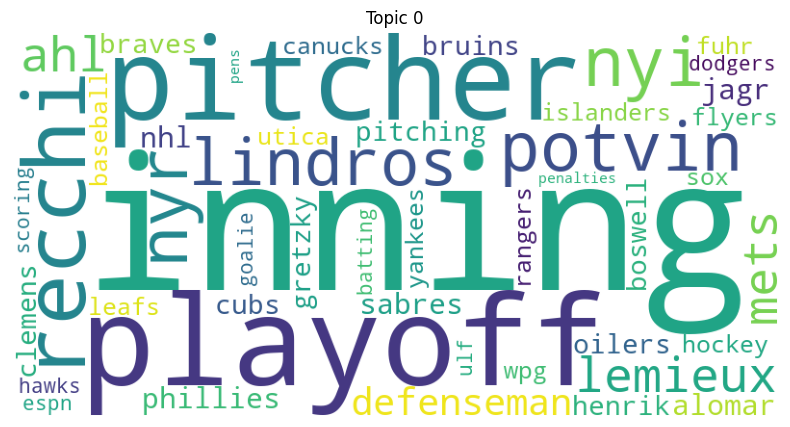

In [13]:
# save topic 0 wordcloud to a .png file
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(" ".join(topic_words[0]))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis("off")
plt.title(f"Topic 0")
plt.savefig("topic0.png")

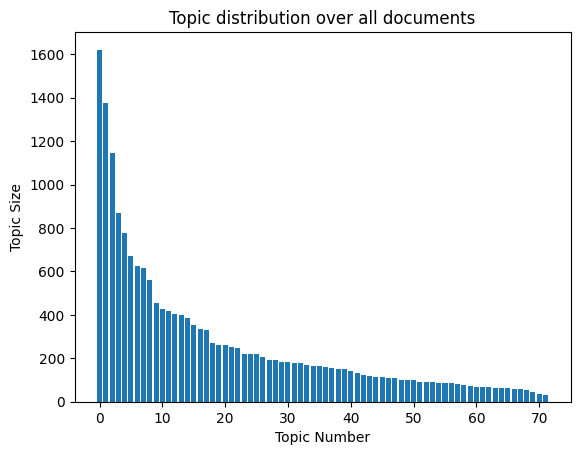

<Figure size 640x480 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt

# Assuming `top2vec` is your Top2Vec model
topic_sizes, topic_nums = top2vec.get_topic_sizes()

plt.bar(topic_nums, topic_sizes)
plt.xlabel('Topic Number')
plt.ylabel('Topic Size')
plt.title('Topic distribution over all documents')
plt.show()
# save the plot to a .png file
plt.savefig("topic_distribution.png")

In [10]:
# topics and the associated words
topic_words, word_scores, topic_nums = top2vec.get_topics()

for i, words in enumerate(topic_words):
    if i == 2: #adjust this number to print more or less topics
        break
    print(f"Topic {i}")
    print(words)
    print("\n")
    print("----------")
    print("\n")

Topic 0
['recchi' 'potvin' 'nyi' 'nyr' 'lindros' 'lemieux' 'ahl' 'mets'
 'defenseman' 'phillies' 'nhl' 'jagr' 'sabres' 'pitchers' 'alomar'
 'pitching' 'cubs' 'inning' 'bruins' 'clemens' 'gretzky' 'boswell'
 'innings' 'henrik' 'braves' 'oilers' 'playoffs' 'islanders' 'baseball'
 'canucks' 'playoff' 'hockey' 'fuhr' 'flyers' 'leafs' 'wpg' 'rangers'
 'sox' 'utica' 'yankees' 'dodgers' 'goalie' 'ulf' 'batting' 'espn' 'hawks'
 'scoring' 'pitcher' 'penalties' 'pens']


----------


Topic 1
['honda' 'motorcycle' 'motorcycles' 'bmw' 'bikes' 'mustang' 'bike' 'car'
 'motor' 'targa' 'vw' 'xdm' 'engines' 'vehicle' 'throttle' 'driving'
 'cars' 'engine' 'drive' 'transmission' 'dealer' 'pedal' 'xt'
 'accelerator' 'mileage' 'tires' 'atf' 'toyota' 'drove' 'ford' 'brakes'
 'tire' 'steering' 'vehicles' 'ride' 'exhaust' 'manuals' 'cylinders'
 'rider' 'torque' 'wheel' 'warranty' 'lx' 'lindros' 'riding' 'tyre' 'mph'
 'highway' 'helmet' 'bearing']


----------




# Evaluation
# The higher the evaluation score the better. .96 is considered good.

In [11]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

# Top2Vec model
topic_words, _, _ = top2vec.get_topics(top2vec.get_num_topics())

# Gensim dictionary from the topic words
dictionary = Dictionary(topic_words)

# Gensim corpus from the topic words
corpus = [dictionary.doc2bow(words) for words in topic_words]

# CoherenceModel
coherence_model = CoherenceModel(topics=topic_words, texts=topic_words, dictionary=dictionary, coherence='c_v')

# Get the coherence score
coherence = coherence_model.get_coherence()
print(coherence)

0.9674246714660097
